In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size =1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f8fc38a44163fbd59a731adf2aa2e05b


In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | amderma
City not found. Skipping...
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | ocos
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | belyy yar
Processing Record 6 of Set 1 | natchez
Processing Record 7 of Set 1 | pisco
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | constitucion
Processing Record 11 of Set 1 | atar
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | nome
Processing Record 14 of Set 1 | buala
Processing Record 15 of Set 1 | kutum
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | valley city
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | noshiro
Processing Record 22 of Set 1 | barao de melgaco
Processing Record 23 of Set 1 | rikitea
Processing Record 24 of Set 1 | bluff
P

In [ ]:
## 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,63.00,72,20,24.16,PT,2022-04-13 19:26:13
1,Ocos,14.5094,-92.1933,91.58,60,9,12.82,GT,2022-04-13 19:26:13
2,Punta Arenas,-53.1500,-70.9167,57.31,62,40,23.02,CL,2022-04-13 19:22:25
3,Belyy Yar,53.6039,91.3903,25.86,64,0,2.24,RU,2022-04-13 19:26:14
4,Natchez,31.5604,-91.4032,82.62,74,75,24.16,US,2022-04-13 19:25:25
5,Pisco,-13.7000,-76.2167,69.03,73,0,8.05,PE,2022-04-13 19:24:55
6,Kapaa,22.0752,-159.3190,78.78,84,75,11.50,US,2022-04-13 19:25:24
7,Yellowknife,62.4560,-114.3525,15.30,58,20,6.91,CA,2022-04-13 19:26:14
8,Constitucion,-35.3333,-72.4167,64.44,48,0,14.12,CL,2022-04-13 19:26:15
9,Atar,20.5169,-13.0499,88.41,9,0,13.00,MR,2022-04-13 19:26:15


In [16]:
#Reorder the columns of the data frame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_ordered_df = city_data_df[new_column_order]

In [17]:
city_data_ordered_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2022-04-13 19:26:13,38.5167,-28.7000,63.00,72,20,24.16
1,Ocos,GT,2022-04-13 19:26:13,14.5094,-92.1933,91.58,60,9,12.82
2,Punta Arenas,CL,2022-04-13 19:22:25,-53.1500,-70.9167,57.31,62,40,23.02
3,Belyy Yar,RU,2022-04-13 19:26:14,53.6039,91.3903,25.86,64,0,2.24
4,Natchez,US,2022-04-13 19:25:25,31.5604,-91.4032,82.62,74,75,24.16
5,Pisco,PE,2022-04-13 19:24:55,-13.7000,-76.2167,69.03,73,0,8.05
6,Kapaa,US,2022-04-13 19:25:24,22.0752,-159.3190,78.78,84,75,11.50
7,Yellowknife,CA,2022-04-13 19:26:14,62.4560,-114.3525,15.30,58,20,6.91
8,Constitucion,CL,2022-04-13 19:26:15,-35.3333,-72.4167,64.44,48,0,14.12
9,Atar,MR,2022-04-13 19:26:15,20.5169,-13.0499,88.41,9,0,13.00


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_ordered_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1649892704.6260512

In [23]:
today = time.strftime("%x")
today

'04/13/22'

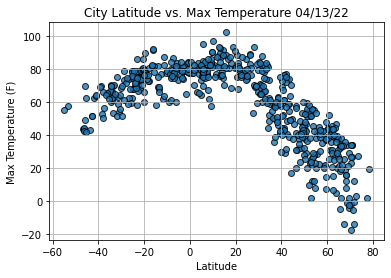

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

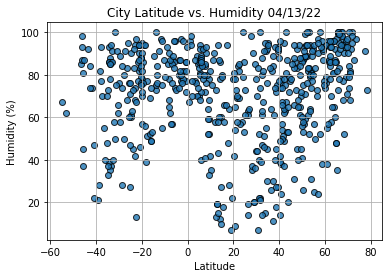

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

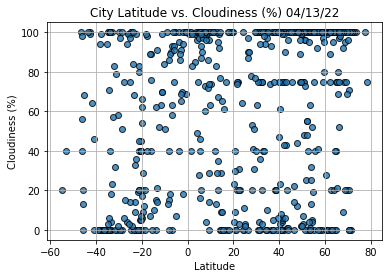

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'tile'

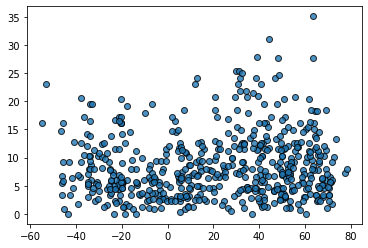

In [30]:
# Build the scatter plots for latitude vs wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incoporate the other graph properties.
plt.tile(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the Figure
plt.savefig("weather_data/Fig4.png")

#Show Plot
plt.show()